# Курсовой проект для курса "Python для Data Science"

## Info

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Основная метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Вспомогательная метрика:
MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

Сдача проекта:
1. Прислать в раздел Задания Урока 12 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb).
2. Приложить файл с названием по образцу SShirkin_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).

Сроки сдачи:
Сдать проект за 72 часа до начала Урока 13 ("Вебинар. Результаты итоговых проектов и закрытие курса").

Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

## Load Dataset


### Load packages

In [1]:
import pandas as pd

### Function

In [2]:
def optimizing_df(df):
    for col in df.columns:
        if df[col].dtypes.kind == 'i' or df[col].dtypes.kind == 'u':
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        elif df[col].dtypes.kind == 'f' or df[col].dtypes.kind == 'c':
            df[col] = pd.to_numeric(df[col], downcast='float')

        elif df[col].dtypes.kind == 'O':
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')

    return df

### Load data

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')
print("Data is loaded!")

Data is loaded!


In [4]:
print(f"Train:\t{train.shape[0]}\t sales and {train.shape[1]} features")
print(f'Test:\t{test.shape[0]}\t sales and {test.shape[1]} features')

Train:	10000	 sales and 20 features
Test:	5000	 sales and 19 features


In [5]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [7]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 3.2 MB


In [8]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 1.6 MB


### Memory use optimization

In [9]:
train['Rooms'] = train['Rooms'].astype('int64')
test['Rooms'] = test['Rooms'].astype('int64')

In [10]:
train['HouseFloor'] = train['HouseFloor'].astype('int64')
test['HouseFloor'] = test['HouseFloor'].astype('int64')

In [11]:
train = optimizing_df(train)
test = optimizing_df(test)

In [12]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null uint16
DistrictId       10000 non-null uint8
Rooms            10000 non-null uint8
Square           10000 non-null float32
LifeSquare       7887 non-null float32
KitchenSquare    10000 non-null float32
Floor            10000 non-null uint8
HouseFloor       10000 non-null uint8
HouseYear        10000 non-null uint32
Ecology_1        10000 non-null float32
Ecology_2        10000 non-null category
Ecology_3        10000 non-null category
Social_1         10000 non-null uint8
Social_2         10000 non-null uint16
Social_3         10000 non-null uint8
Healthcare_1     5202 non-null float32
Helthcare_2      10000 non-null uint8
Shops_1          10000 non-null uint8
Shops_2          10000 non-null category
Price            10000 non-null float32
dtypes: category(3), float32(6), uint16(2), uint32(1), uint8(8)
memory usage: 420.6 KB


In [13]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null uint16
DistrictId       5000 non-null uint8
Rooms            5000 non-null uint8
Square           5000 non-null float32
LifeSquare       3959 non-null float32
KitchenSquare    5000 non-null float32
Floor            5000 non-null uint8
HouseFloor       5000 non-null uint8
HouseYear        5000 non-null uint16
Ecology_1        5000 non-null float32
Ecology_2        5000 non-null category
Ecology_3        5000 non-null category
Social_1         5000 non-null uint8
Social_2         5000 non-null uint16
Social_3         5000 non-null uint8
Healthcare_1     2623 non-null float32
Helthcare_2      5000 non-null uint8
Shops_1          5000 non-null uint8
Shops_2          5000 non-null category
dtypes: category(3), float32(5), uint16(3), uint8(8)
memory usage: 181.4 KB


### Data checking

#### Function

In [14]:
all_data = pd.concat((train, test), sort=False).reset_index(drop=True)
all_data.drop(['Price'], axis=1, inplace=True)
print(f'all_data size is : {all_data.shape}')

all_data size is : (15000, 19)


In [15]:
all_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,15000.0,8393.136933,4850.111673,0.000000,4188.750000,8378.500000,12594.250000,1.679800e+04
DistrictId,15000.0,50.693600,43.786257,0.000000,20.000000,37.000000,75.000000,2.120000e+02
Rooms,15000.0,1.897000,0.839229,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,15000.0,56.360352,20.423912,1.136859,41.814370,52.645758,66.036606,6.410652e+02
LifeSquare,11846.0,36.851791,71.120186,0.333490,22.896130,32.822811,45.144627,7.480592e+03
KitchenSquare,15000.0,6.174467,24.016979,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,15000.0,8.561800,5.323113,1.000000,4.000000,7.000000,12.000000,7.800000e+01
HouseFloor,15000.0,12.606600,6.780165,0.000000,9.000000,12.000000,17.000000,1.170000e+02
HouseYear,15000.0,3321.575067,163707.780381,1908.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,15000.0,0.119196,0.119371,0.000000,0.017647,0.075424,0.195781,5.218670e-01


#### mean_price_dr	sum_roos_dr	sum_square_dr	square_room

In [16]:
info_by_district_id = train.groupby(['DistrictId'], as_index=False).\
                        agg({'Rooms': 'sum', 'Square': 'sum'}).\
                        rename(columns={'Rooms': 'sum_roos_dr', 'Square': 'sum_square_dr'})

In [17]:
info_by_district_id['square_room_dr'] = info_by_district_id['sum_square_dr'] / info_by_district_id['sum_roos_dr']
info_by_district_id = info_by_district_id.drop(['sum_roos_dr', 'sum_square_dr'], axis=1)
info_by_district_id.head()

,DistrictId,square_room_dr
0,0,30.804642
1,1,32.298252
2,2,28.200556
3,3,28.551012
4,4,28.271247


In [18]:
info_by_district_id['square_room_dr'].mean()

28.1478424550721

In [19]:
def square_room_dr(df, info_by_district_id):
    df = pd.merge(df, info_by_district_id, on='DistrictId', how='left')
    df['square_room_dr'] = df['square_room_dr'].fillna(df['square_room_dr'].mean())
    return df

In [20]:
train = square_room_dr(train, info_by_district_id)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id                10000 non-null uint16
DistrictId        10000 non-null uint8
Rooms             10000 non-null uint8
Square            10000 non-null float32
LifeSquare        7887 non-null float32
KitchenSquare     10000 non-null float32
Floor             10000 non-null uint8
HouseFloor        10000 non-null uint8
HouseYear         10000 non-null uint32
Ecology_1         10000 non-null float32
Ecology_2         10000 non-null category
Ecology_3         10000 non-null category
Social_1          10000 non-null uint8
Social_2          10000 non-null uint16
Social_3          10000 non-null uint8
Healthcare_1      5202 non-null float32
Helthcare_2       10000 non-null uint8
Shops_1           10000 non-null uint8
Shops_2           10000 non-null category
Price             10000 non-null float32
square_room_dr    10000 non-null float64
dtypes: category(3), float32(6), float64(1), uint

In [21]:
test = square_room_dr(test, info_by_district_id)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id                5000 non-null uint16
DistrictId        5000 non-null uint8
Rooms             5000 non-null uint8
Square            5000 non-null float32
LifeSquare        3959 non-null float32
KitchenSquare     5000 non-null float32
Floor             5000 non-null uint8
HouseFloor        5000 non-null uint8
HouseYear         5000 non-null uint16
Ecology_1         5000 non-null float32
Ecology_2         5000 non-null category
Ecology_3         5000 non-null category
Social_1          5000 non-null uint8
Social_2          5000 non-null uint16
Social_3          5000 non-null uint8
Healthcare_1      2623 non-null float32
Helthcare_2       5000 non-null uint8
Shops_1           5000 non-null uint8
Shops_2           5000 non-null category
square_room_dr    5000 non-null float64
dtypes: category(3), float32(5), float64(1), uint16(3), uint8(8)
memory usage: 259.1 KB


#### Rooms

In [22]:
train.loc[train['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,square_room_dr
377,5927,57,10,59.056976,36.223072,10.0,22,22,2002,0.090799,...,B,74,19083,2,NaN,5,15,B,317265.312500,27.644224
1454,8491,1,19,42.006046,21.779287,7.0,17,17,2014,0.007122,...,B,1,264,0,NaN,0,1,B,78364.617188,32.298252
8849,14865,9,10,60.871265,38.420681,10.0,3,2,1994,0.161532,...,B,25,5648,1,30.0,2,4,B,172329.265625,30.167462


In [23]:
train.loc[train['Rooms'] == 10, 'Rooms'] = 2
train.loc[train['Rooms'] == 19, 'Rooms'] = 1

In [24]:
test.loc[test['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,square_room_dr
3398,1435,111,17,52.866108,32.528343,8.0,15,17,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B,26.602781


In [25]:
test.loc[test['Rooms'] == 17, 'Rooms'] = 2

In [26]:
all_data.loc[all_data['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1397,12638,27,0,138.427689,136.215500,0.0,4,3,2016,0.075424,B,B,11,3097,0,NaN,0,0,B
1981,7917,27,0,212.932358,211.231125,0.0,2,3,2008,0.211401,B,B,9,1892,0,NaN,0,1,B
2269,7317,27,0,41.790882,NaN,0.0,13,0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3911,770,28,0,49.483501,NaN,0.0,16,0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B
4366,456,6,0,81.491447,NaN,0.0,4,0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4853,3224,27,0,2.377248,0.873147,0.0,1,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
6149,3159,88,0,38.697117,19.345131,9.0,9,16,1982,0.127376,B,B,43,8429,3,NaN,3,9,B
8834,9443,27,0,87.762619,85.125473,0.0,5,15,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
12406,3343,58,0,116.824203,113.692421,0.0,3,3,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
12524,10729,27,0,76.345154,42.820797,12.0,14,0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [27]:
def df_fix_room(df):
    df.loc[df['Rooms'] == 0, 'Rooms'] = df.loc[train['Rooms'] == 0, 'Square'] \
                                        // df.loc[train['Rooms'] == 0, 'square_room_dr']
    df.loc[train['Rooms'] == 0, 'Rooms'] = 1
    return df

In [28]:
test = df_fix_room(test)
train = df_fix_room(train)

#### Square

In [29]:
def prepare_lifesquare(df):
    df.loc[df['Square'] < df['LifeSquare'], 'LifeSquare'] = df['Square']
    return df


def fillna_life_square(df):
    df['LifeSquare'] = df['LifeSquare'].fillna(df['LifeSquare'].mean())
    return df

In [30]:
train.loc[(~train['Square'].between(30,65)),:].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,square_room_dr
1,15053,41,3.0,65.683640,40.049541,8.0,7,9,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.437500,26.633208
5,12915,59,3.0,80.384476,46.683720,12.0,5,17,2011,0.309479,...,B,35,7715,4,990.0,0,6,B,215898.453125,32.343987
7,11993,74,2.0,80.312927,NaN,0.0,14,0,1977,0.075779,...,B,6,1437,3,NaN,0,2,B,221244.156250,38.632399
11,12427,31,3.0,68.808861,45.736904,7.0,1,8,1959,0.000000,...,B,23,3684,2,NaN,0,4,B,165534.546875,28.851469
13,2408,57,3.0,68.102737,39.311493,8.0,6,12,1980,0.133215,...,B,49,11395,3,1406.0,3,4,A,252481.906250,27.644224


In [31]:
train = prepare_lifesquare(train)
train = fillna_life_square(train)

In [32]:
test = prepare_lifesquare(test)
test = fillna_life_square(test)

In [33]:
def df_fix_square(df):
    df['test_square'] = df['Rooms'] * df['square_room_dr']
    df.loc[abs(df['Square'] - df['test_square']) > 100, 'Square'] = df['Rooms'] * df['square_room_dr']
    df.drop(['test_square'], axis=1)
    return df

In [34]:
train = df_fix_square(train)
test = df_fix_square(test)

#### HouseYear

In [35]:
all_data.loc[all_data['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1497,10814,109,1,37.265072,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B
4189,11607,147,2,44.791836,28.360394,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B


In [36]:
train.loc[train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,square_room_dr,test_square
1497,10814,109,1.0,37.265072,20.239714,9.0,9,12,20052011,0.136330,...,30,6141,10,262.0,3,6,B,254084.531250,26.544447,26.544447
4189,11607,147,2.0,44.791836,28.360394,5.0,4,9,4968,0.319809,...,25,4756,16,2857.0,5,8,B,243028.609375,25.311440,50.622880


In [37]:
test.loc[test['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,square_room_dr,test_square


In [38]:
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = int((2005 + 2011)/2)

In [39]:
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968

## Data Processing

### Load packages

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

### Target Variable¶

#### Normal distribution of the target variable

mu = 214138.86 and sigma = 92867.65


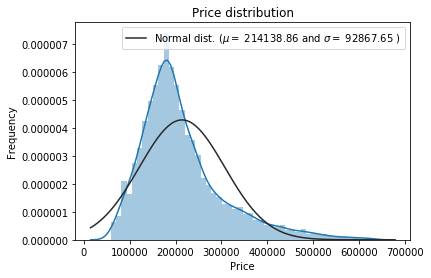

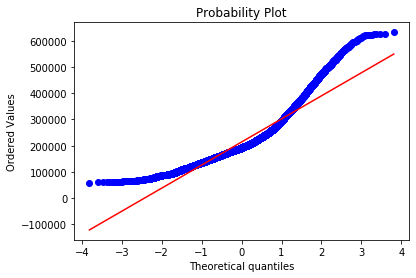

In [41]:
sns.distplot(train['Price'], fit=norm)

mu, sigma = norm.fit(train['Price'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)
plt.show()

#### Log distribution of the target variable

mu = 214138.86 and sigma = 92867.65


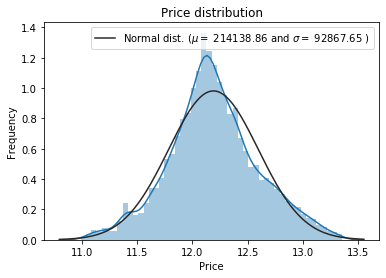

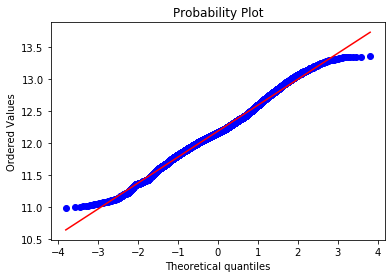

In [42]:
price_log = np.log1p(train['Price'])
sns.distplot(price_log, fit=norm)

mu, sigma = norm.fit(train['Price'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(price_log, plot=plt)
plt.show()

### Distribution of variable House Year

Text(0.5, 1.0, 'Distribution of variable House Year')

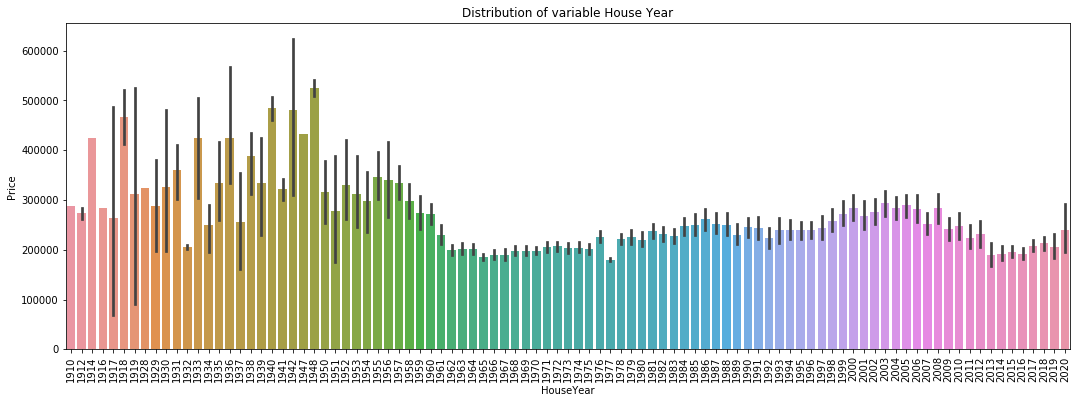

In [43]:
plt.figure(figsize=(18, 6))
sns.barplot(train['HouseYear'], train['Price'])
plt.xticks(rotation=90)
plt.title('Distribution of variable House Year')

### Distribution of variable District Id 

Text(0.5, 1.0, 'Distribution of variable District Id')

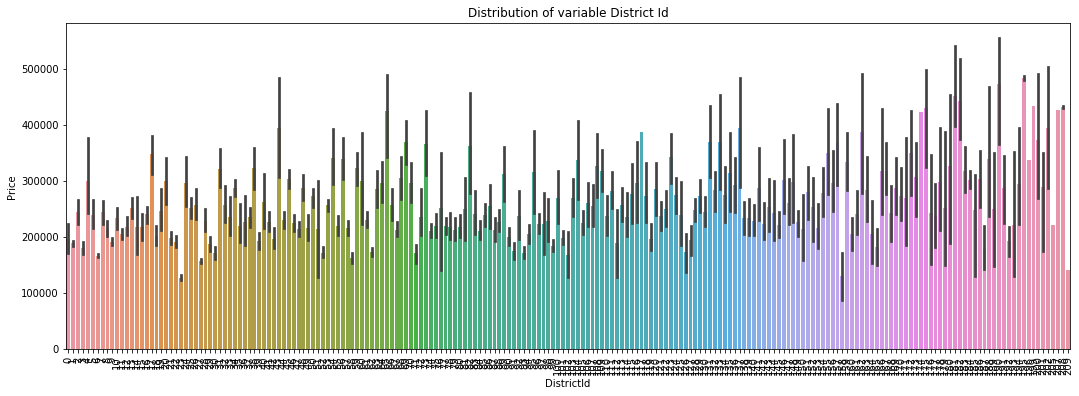

In [44]:
plt.figure(figsize=(18, 6))
sns.barplot(train['DistrictId'], train['Price'])
plt.xticks(rotation=90)
plt.title('Distribution of variable District Id')

### Features engineering

#### Missing Data

In [45]:
all_data = pd.concat((train, test), sort=False).reset_index(drop=True)
all_data.drop(['Price'], axis=1, inplace=True)
print(f'all_data size is : {all_data.shape}')

all_data size is : (15000, 21)


In [46]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(
    all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

,Missing Ratio
Healthcare_1,47.833333
test_square,0.013333
Rooms,0.013333


#### Data Correlation

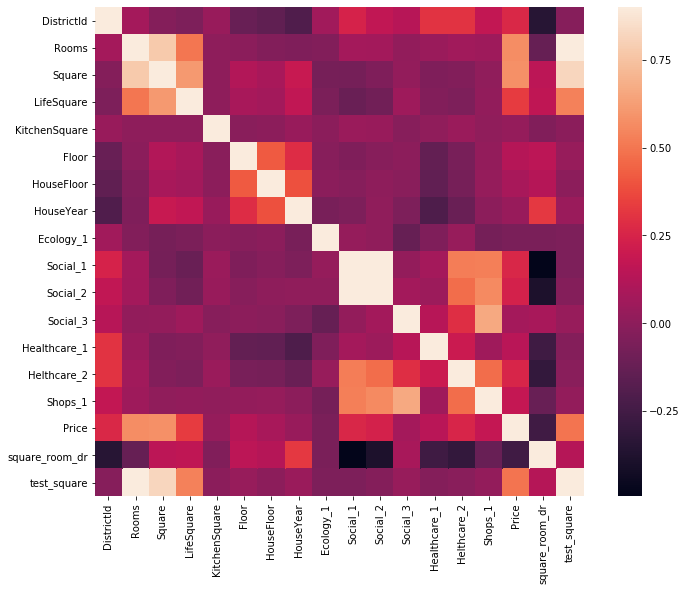

In [47]:
corrmat = train.loc[:, train.columns != 'Id'].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True)

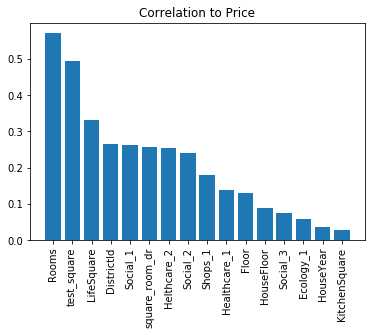

In [48]:
corrmat = train.loc[:, train.columns != 'Id'].corrwith(
    train['Price']).abs().sort_values(ascending=False)[2:]
plt.bar(corrmat.index, corrmat.values)
plt.title('Correlation to Price')
plt.xticks(rotation='vertical')
plt.show()

#### Dummy variables

In [49]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [50]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,square_room_dr,test_square,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882645,33.432781,6.0,6,14,1972,0.310199,...,0,0,33.632415,67.264829,0,1,0,1,0,1
1,15856,74,2.0,69.263184,35.979824,1.0,6,1,1977,0.075779,...,0,2,38.632399,77.264797,0,1,0,1,0,1
2,5480,190,1.0,13.597818,13.597818,12.0,2,5,1909,0.000000,...,5,5,23.728158,23.728158,0,1,0,1,0,1
3,15664,47,2.0,73.046608,51.940842,9.0,22,22,2007,0.101872,...,3,3,28.810999,57.621999,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17,2017,0.072158,...,0,0,33.264692,33.264692,0,1,0,1,1,0


#### Cluster

In [51]:
scaler = MinMaxScaler()

In [52]:
train_scaled = pd.DataFrame(scaler.fit_transform(
    train.loc[:, ['HouseYear', 'Price']]), columns=['HouseYear', 'Price'])
test_scaled = pd.DataFrame(scaler.fit_transform(
    test.loc[:, ['HouseYear']]), columns=['HouseYear'])

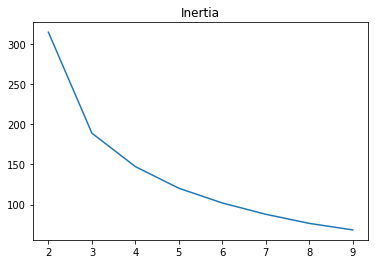

In [53]:
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)
plt.title('Inertia')

plt.show()

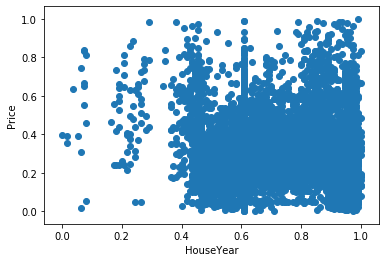

In [54]:
plt.scatter(train_scaled['HouseYear'], train_scaled['Price'])
plt.xlabel('HouseYear')
plt.ylabel('Price')
plt.show()

In [55]:
kmeans_model = KMeans(n_clusters=5, random_state=100)

In [56]:
train_labels = kmeans_model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train data')

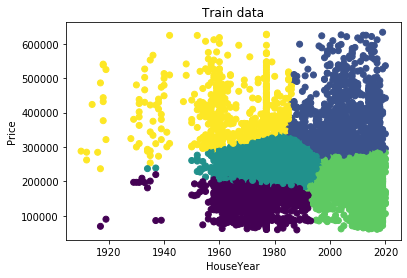

In [57]:
plt.scatter(train['HouseYear'], train['Price'], c=train_labels)

plt.xlabel('HouseYear')
plt.ylabel('Price')

plt.title('Train data')

In [58]:
agglomerative_clustering_model = AgglomerativeClustering(n_clusters=5)

In [59]:
train['cluster_year'] = agglomerative_clustering_model.fit_predict(
    train_scaled)

Text(0.5, 1.0, 'Train')

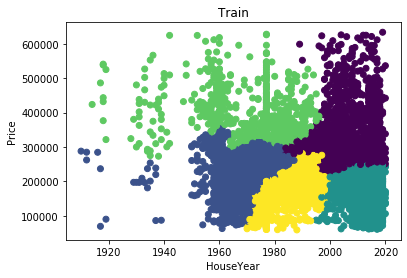

In [60]:
plt.scatter(train['HouseYear'], train['Price'], c=train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('Price')
plt.title('Train')

In [61]:
test['cluster_year'] = agglomerative_clustering_model.fit_predict(test_scaled)

#### Mean price by Rooms and Mean price by DistrictId and Rooms

In [62]:
price = train['Price'].mean()
price_mean_by_rooms = train.groupby(['Rooms'], as_index=False).agg({'Price': 'mean'}).\
    rename(columns={'Price': 'mean_price_by_rooms'})
price_mean_by_distr_rooms = train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'mean'}).\
    rename(columns={'Price': 'mean_price_dr'})

In [63]:
price_mean_by_rooms.head()

,Rooms,mean_price_by_rooms
0,1.0,159818.40625
1,2.0,215271.93750
2,3.0,289337.96875
3,4.0,382490.46875
4,5.0,410431.59375


In [64]:
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_dr
0,0,1.0,141262.609375
1,0,2.0,197998.140625
2,0,3.0,304170.531250
3,1,1.0,147186.812500
4,1,2.0,198777.281250


In [65]:
def add_mean_price(df, price_mean_by_distr_rooms, price_mean_by_rooms, price):
    df = pd.merge(df, price_mean_by_distr_rooms, on=[
                  'DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, price_mean_by_rooms, on='Rooms', how='left')
    df['mean_price_dr'] = df['mean_price_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_dr'] = df['mean_price_dr'].fillna(price)
    df['mean_price_by_rooms'] = df['mean_price_by_rooms'].fillna(price)
    return df

#### Large district

In [66]:
distr_info1 = train['DistrictId'].value_counts().reset_index().\
    rename(columns={"index": "DistrictId", "DistrictId": 'large_district'})

In [67]:
distr_info1.head()

,DistrictId,large_district
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [68]:
def add_distr_info(df, distr_info1):
    df = pd.merge(df, distr_info1, on='DistrictId', how='left')
    df['large_district'] = df['large_district'].fillna(1)
    return df

## Modelling

### Load packages

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

###  Data processing

In [70]:
train = add_mean_price(train, price_mean_by_distr_rooms,
                       price_mean_by_rooms, price)
test = add_mean_price(test, price_mean_by_distr_rooms,
                      price_mean_by_rooms, price)

In [71]:
train = add_distr_info(train, distr_info1)
test = add_distr_info(test, distr_info1)

In [72]:
print(train.columns)

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'square_room_dr', 'test_square', 'Ecology_2_A', 'Ecology_2_B',
       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'cluster_year',
       'mean_price_dr', 'mean_price_by_rooms', 'large_district'],
      dtype='object')


In [73]:
features = ['DistrictId',
            'Rooms',
            'Square',
            'LifeSquare',
            'KitchenSquare',
            'Floor',
            'HouseFloor',
            'HouseYear',
            'Ecology_1',
            'Social_1',
            'Social_2',
            'Social_3',
            'Helthcare_2',
            'Shops_1',
            'Ecology_2_A',
            'Ecology_2_B',
            'Ecology_3_A',
            'Ecology_3_B',
            'Shops_2_A',
            'Shops_2_B',
            'mean_price_dr',
            'mean_price_by_rooms',
            'cluster_year',
            'large_district',
            ]

target = 'Price'

In [74]:
models_dict = {}

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    train[features], train[target], test_size=0.3, random_state=42)

### Function

In [76]:
def model_test(model, name='', test=X_test, valid=y_test):
    model_pred = model.predict(test)
    r2 = r2_score(valid, model_pred)
    mse = mean_squared_error(valid, model_pred)
    plt.scatter(valid, (model_pred - valid))
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.title(name)
    plt.legend([f'R2= {r2:.4f} and mse= {mse:.0f}'])
    plt.axhline(0, color='red')
    plt.show()


def model_top_deviation(model, test=X_test, valid=y_test):
    model_pred = model.predict(test)
    model_test = test.copy()
    model_test['Price'] = model_pred.astype('int32')
    model_test['Price_test'] = valid.astype('int32')
    model_test['SD'] = abs(model_test['Price']
                           - model_test['Price_test']).astype('int32')
    return model_test.nlargest(10, 'SD')

### Linear Regression

In [77]:
line_regression_model = LinearRegression(normalize=True)
line_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [78]:
models_dict['Linear Regression'] = line_regression_model

#### Test Linear Regression

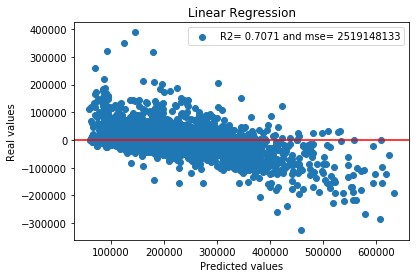

In [79]:
model_test(line_regression_model, 'Linear Regression')

In [80]:
model_top_deviation(line_regression_model)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr,mean_price_by_rooms,cluster_year,large_district,Price,Price_test,SD
132,108,3.0,110.203972,59.270702,12.0,19,28,2007,0.019509,37,...,1,0,1,454956.937500,289337.96875,2,27,534816,146061,388755
3662,54,3.0,101.279846,52.188698,20.0,20,37,2014,0.006076,30,...,1,0,1,406272.531250,289337.96875,2,37,474791,124844,349947
8283,34,1.0,1.988943,1.988943,1.0,21,4,1977,0.069753,53,...,1,0,1,204809.359375,159818.40625,3,111,134235,458378,324143
9488,59,3.0,85.289093,51.296257,10.0,13,25,2011,0.309479,35,...,1,0,1,400943.031250,289337.96875,2,67,413533,92295,321238
7728,24,3.0,126.621361,62.455482,12.0,22,48,2011,0.111627,50,...,1,0,1,361843.250000,289337.96875,2,35,496860,179396,317464
3305,66,3.0,78.747856,33.885761,11.0,2,5,1955,0.161976,31,...,0,0,1,338540.718750,289337.96875,3,62,323777,606958,283181
8088,119,2.0,91.713600,47.760426,11.0,11,24,2001,0.000995,42,...,1,0,1,203318.734375,215271.93750,0,49,311887,578626,266739
212,88,2.0,5.497061,5.497061,1.0,24,22,1977,0.127376,43,...,1,0,1,225038.828125,215271.93750,3,64,153128,412511,259383
696,113,3.0,94.417145,56.749168,11.0,6,18,2008,0.050756,24,...,1,0,1,296753.062500,289337.96875,2,41,329566,71057,258509
7447,23,3.0,78.062851,36.048752,1.0,14,17,2017,0.014334,2,...,1,0,1,170912.203125,289337.96875,0,565,194650,431238,236588


### Random Forest Regressor

In [81]:
random_forest_regressor_model = RandomForestRegressor(
    n_estimators=40, max_depth=10, random_state=42)
random_forest_regressor_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [82]:
models_dict['Random Forest Regressor'] = random_forest_regressor_model

#### Test Random Forest Regressor

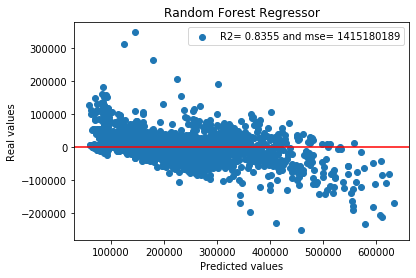

In [83]:
model_test(random_forest_regressor_model, 'Random Forest Regressor')

In [84]:
model_top_deviation(random_forest_regressor_model)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr,mean_price_by_rooms,cluster_year,large_district,Price,Price_test,SD
132,108,3.0,110.203972,59.270702,12.0,19,28,2007,0.019509,37,...,1,0,1,454956.937500,289337.96875,2,27,494625,146061,348564
3662,54,3.0,101.279846,52.188698,20.0,20,37,2014,0.006076,30,...,1,0,1,406272.531250,289337.96875,2,37,437636,124844,312792
7728,24,3.0,126.621361,62.455482,12.0,22,48,2011,0.111627,50,...,1,0,1,361843.250000,289337.96875,2,35,443860,179396,264464
8283,34,1.0,1.988943,1.988943,1.0,21,4,1977,0.069753,53,...,1,0,1,204809.359375,159818.40625,3,111,207342,458378,251036
8088,119,2.0,91.713600,47.760426,11.0,11,24,2001,0.000995,42,...,1,0,1,203318.734375,215271.93750,0,49,346722,578626,231904
6838,33,1.0,60.222343,36.048752,1.0,21,25,1977,0.236108,16,...,1,0,1,180837.406250,159818.40625,3,31,180969,411959,230990
9828,24,3.0,127.141144,4.811405,1.0,3,1,2017,0.111627,50,...,1,0,1,361843.250000,289337.96875,0,35,399994,611250,211256
9765,45,3.0,82.193428,36.048752,1.0,17,17,1977,0.195781,23,...,1,0,1,393951.531250,289337.96875,1,116,431781,224868,206913
3305,66,3.0,78.747856,33.885761,11.0,2,5,1955,0.161976,31,...,0,0,1,338540.718750,289337.96875,3,62,401211,606958,205747
8979,22,1.0,87.485626,36.048752,0.0,16,0,1977,0.118537,30,...,1,0,1,162263.906250,159818.40625,3,78,164787,361744,196957


### Gradient Boosting Regressor

In [85]:
gradient_boosting_regressor_model = GradientBoostingRegressor()
gradient_boosting_regressor_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
models_dict['Gradient Boosting Regressor'] = gradient_boosting_regressor_model

#### Test Gradient Boosting Regressor

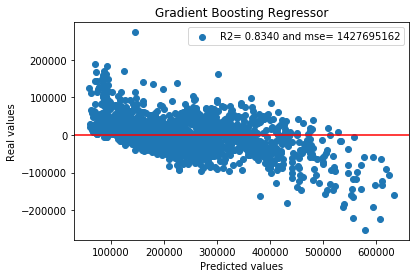

In [87]:
model_test(gradient_boosting_regressor_model, 'Gradient Boosting Regressor')

In [88]:
model_top_deviation(gradient_boosting_regressor_model)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr,mean_price_by_rooms,cluster_year,large_district,Price,Price_test,SD
132,108,3.0,110.203972,59.270702,12.0,19,28,2007,0.019509,37,...,1,0,1,454956.937500,289337.96875,2,27,419673,146061,273612
8088,119,2.0,91.713600,47.760426,11.0,11,24,2001,0.000995,42,...,1,0,1,203318.734375,215271.93750,0,49,325859,578626,252767
3305,66,3.0,78.747856,33.885761,11.0,2,5,1955,0.161976,31,...,0,0,1,338540.718750,289337.96875,3,62,384231,606958,222727
6117,17,3.0,54.036552,43.891273,8.0,6,21,2017,0.093443,23,...,1,0,1,419768.781250,289337.96875,0,59,335480,556053,220573
1918,63,1.0,127.651237,2.609712,1.0,8,17,2016,0.238617,26,...,1,0,1,253604.218750,159818.40625,0,43,402714,594565,191851
2554,190,2.0,47.489414,35.564480,4.0,5,5,1918,0.000000,30,...,1,0,1,370810.750000,215271.93750,3,7,347287,537979,190692
696,113,3.0,94.417145,56.749168,11.0,6,18,2008,0.050756,24,...,1,0,1,296753.062500,289337.96875,2,41,260991,71057,189934
4373,66,2.0,74.418358,70.893913,9.0,15,17,2003,0.111627,50,...,1,0,1,256642.000000,215271.93750,0,62,355308,538574,183266
9488,59,3.0,85.289093,51.296257,10.0,13,25,2011,0.309479,35,...,1,0,1,400943.031250,289337.96875,2,67,274717,92295,182422
7447,23,3.0,78.062851,36.048752,1.0,14,17,2017,0.014334,2,...,1,0,1,170912.203125,289337.96875,0,565,249424,431238,181814


### LassoCV

In [89]:
lasso_cv_model = LassoCV()

lasso_cv_model.fit(X_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [90]:
models_dict['LassoCV'] = lasso_cv_model

#### Test LassoCV

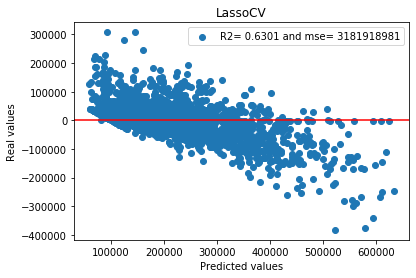

In [91]:
model_test(lasso_cv_model, 'LassoCV')

In [92]:
model_top_deviation(lasso_cv_model)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr,mean_price_by_rooms,cluster_year,large_district,Price,Price_test,SD
8824,30,1.0,117.370743,102.187202,6.0,14,40,2011,0.000078,22,...,1,0,1,138446.187500,159818.40625,0,228,138877,521829,382952
8088,119,2.0,91.713600,47.760426,11.0,11,24,2001,0.000995,42,...,1,0,1,203318.734375,215271.93750,0,49,203399,578626,375227
1918,63,1.0,127.651237,2.609712,1.0,8,17,2016,0.238617,26,...,1,0,1,253604.218750,159818.40625,0,43,253413,594565,341152
9488,59,3.0,85.289093,51.296257,10.0,13,25,2011,0.309479,35,...,1,0,1,400943.031250,289337.96875,2,67,399957,92295,307662
132,108,3.0,110.203972,59.270702,12.0,19,28,2007,0.019509,37,...,1,0,1,454956.937500,289337.96875,2,27,453680,146061,307619
7516,58,3.0,103.024529,57.295414,14.0,18,24,2005,0.050756,24,...,1,0,1,257313.671875,289337.96875,0,179,257103,557202,300099
8921,94,3.0,108.957283,51.063721,27.0,2,22,2008,0.282798,33,...,1,0,1,274419.875000,289337.96875,0,89,274117,562559,288442
4373,66,2.0,74.418358,70.893913,9.0,15,17,2003,0.111627,50,...,1,0,1,256642.000000,215271.93750,0,62,256435,538574,282139
3662,54,3.0,101.279846,52.188698,20.0,20,37,2014,0.006076,30,...,1,0,1,406272.531250,289337.96875,2,37,405258,124844,280414
5425,85,3.0,121.617058,36.048752,1.0,4,17,2016,0.037178,52,...,1,0,1,277434.468750,289337.96875,0,76,277115,554809,277694


### LGBMRegressor

In [93]:
lgbm_regressor_model = LGBMRegressor()
lgbm_regressor_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [94]:
models_dict['LGBMRegressor'] = lgbm_regressor_model

#### Test LGBMRegressor

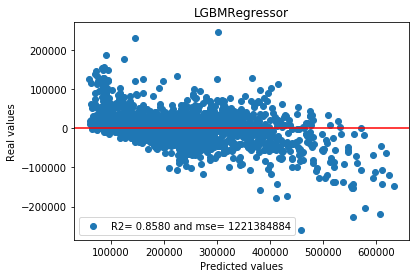

In [95]:
model_test(lgbm_regressor_model, 'LGBMRegressor')

In [96]:
model_top_deviation(lgbm_regressor_model)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr,mean_price_by_rooms,cluster_year,large_district,Price,Price_test,SD
8283,34,1.0,1.988943,1.988943,1.0,21,4,1977,0.069753,53,...,1,0,1,204809.359375,159818.40625,3,111,198969,458378,259409
7375,2,3.0,117.237801,62.361488,17.0,2,15,2008,0.035145,42,...,1,0,1,342699.343750,289337.96875,0,78,546862,302416,244446
132,108,3.0,110.203972,59.270702,12.0,19,28,2007,0.019509,37,...,1,0,1,454956.937500,289337.96875,2,27,377069,146061,231008
6117,17,3.0,54.036552,43.891273,8.0,6,21,2017,0.093443,23,...,1,0,1,419768.781250,289337.96875,0,59,330003,556053,226050
3305,66,3.0,78.747856,33.885761,11.0,2,5,1955,0.161976,31,...,0,0,1,338540.718750,289337.96875,3,62,389179,606958,217779
8088,119,2.0,91.713600,47.760426,11.0,11,24,2001,0.000995,42,...,1,0,1,203318.734375,215271.93750,0,49,374071,578626,204555
3000,137,2.0,64.877319,38.682858,8.0,8,8,1956,0.200147,23,...,1,0,1,229068.046875,215271.93750,1,9,278474,90930,187544
6838,33,1.0,60.222343,36.048752,1.0,21,25,1977,0.236108,16,...,1,0,1,180837.406250,159818.40625,3,31,232847,411959,179112
3662,54,3.0,101.279846,52.188698,20.0,20,37,2014,0.006076,30,...,1,0,1,406272.531250,289337.96875,2,37,301101,124844,176257
7447,23,3.0,78.062851,36.048752,1.0,14,17,2017,0.014334,2,...,1,0,1,170912.203125,289337.96875,0,565,259358,431238,171880


### XGBRegressor

In [97]:
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

/usr/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [98]:
models_dict['XGBRegressor'] = xgboost_model

#### Test XGBRegressor

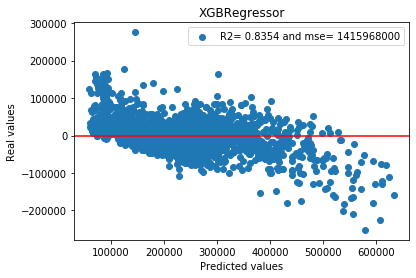

In [99]:
model_test(xgboost_model, 'XGBRegressor')

In [100]:
model_top_deviation(xgboost_model)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price_dr,mean_price_by_rooms,cluster_year,large_district,Price,Price_test,SD
132,108,3.0,110.203972,59.270702,12.0,19,28,2007,0.019509,37,...,1,0,1,454956.937500,289337.96875,2,27,421468,146061,275407
8088,119,2.0,91.713600,47.760426,11.0,11,24,2001,0.000995,42,...,1,0,1,203318.734375,215271.93750,0,49,326811,578626,251815
3305,66,3.0,78.747856,33.885761,11.0,2,5,1955,0.161976,31,...,0,0,1,338540.718750,289337.96875,3,62,381543,606958,225415
6117,17,3.0,54.036552,43.891273,8.0,6,21,2017,0.093443,23,...,1,0,1,419768.781250,289337.96875,0,59,347472,556053,208581
2554,190,2.0,47.489414,35.564480,4.0,5,5,1918,0.000000,30,...,1,0,1,370810.750000,215271.93750,3,7,337918,537979,200061
4373,66,2.0,74.418358,70.893913,9.0,15,17,2003,0.111627,50,...,1,0,1,256642.000000,215271.93750,0,62,356161,538574,182413
7447,23,3.0,78.062851,36.048752,1.0,14,17,2017,0.014334,2,...,1,0,1,170912.203125,289337.96875,0,565,250866,431238,180372
1918,63,1.0,127.651237,2.609712,1.0,8,17,2016,0.238617,26,...,1,0,1,253604.218750,159818.40625,0,43,415383,594565,179182
3662,54,3.0,101.279846,52.188698,20.0,20,37,2014,0.006076,30,...,1,0,1,406272.531250,289337.96875,2,37,300928,124844,176084
8283,34,1.0,1.988943,1.988943,1.0,21,4,1977,0.069753,53,...,1,0,1,204809.359375,159818.40625,3,111,284124,458378,174254


## Result

### Load packages

In [101]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Function

In [102]:
def models_r2(models, test, valid):
    scores = pd.DataFrame(columns=['name', 'r2', 'mse'])
    for name, model in models.items():
        test_pred = model.predict(test)
        r2 = r2_score(valid, test_pred)
        mse = mean_squared_error(valid, test_pred)
        scores = scores.append(
            {'name': name, 'r2': r2, 'mse': mse}, ignore_index=True)
    scores.sort_values('r2', ascending=False, inplace=True)
    return scores

### Choosing the best model

In [103]:
models_score_test = models_r2(models_dict, X_test, y_test)

In [104]:
models_score_test[['name', 'r2']]

,name,r2
4,LGBMRegressor,0.858007
1,Random Forest Regressor,0.835478
5,XGBRegressor,0.835386
2,Gradient Boosting Regressor,0.834023
0,Linear Regression,0.707136
3,LassoCV,0.630085


In [105]:
models_score_train = models_r2(models_dict, X_train, y_train)

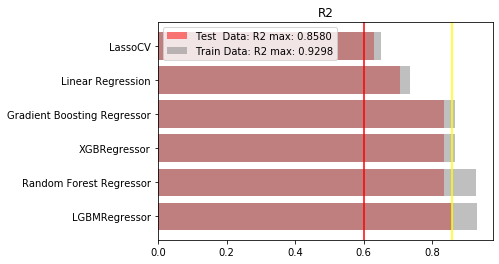

In [106]:
r2_max_test = models_score_test['r2'].max()
r2_max_train = models_score_train['r2'].max()
plt.barh(models_score_test['name'], models_score_test['r2'],
         alpha=0.5, color='red', label=f'Test  Data: R2 max: {r2_max_test:.4f}')
plt.barh(models_score_train['name'], models_score_train['r2'],
         alpha=0.5, color='grey', label=f'Train Data: R2 max: {r2_max_train:.4f}')
plt.title('R2')
plt.legend()
plt.axvline(0.6, color='red')
plt.axvline(r2_max_test, color='yellow')
plt.show()

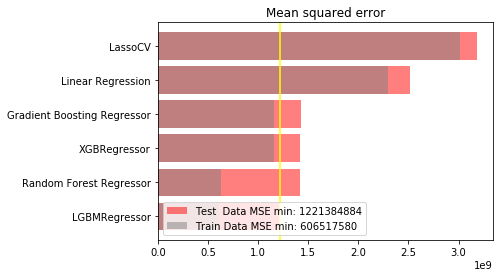

In [107]:
mse_min_test = models_score_test['mse'].min()
mse_min_train = models_score_train['mse'].min()
plt.barh(models_score_test['name'], models_score_test['mse'],
         alpha=0.5, color='red', label=f'Test  Data MSE min: {mse_min_test:.0f}')
plt.barh(models_score_train['name'], models_score_train['mse'],
         alpha=0.5, color='grey', label=f'Train Data MSE min: {mse_min_train:.0f}')
plt.title('Mean squared error')
plt.legend(loc=3)
plt.axvline(mse_min_test, color='yellow')
plt.show()

In [108]:
best_model = models_dict['LGBMRegressor']

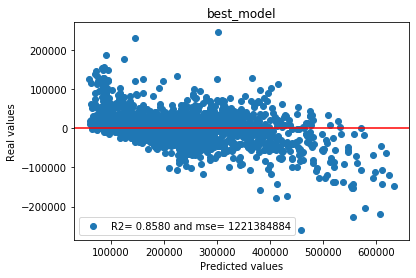

In [109]:
model_test(best_model, 'best_model')

## Output Files

In [110]:
test['Price'] = best_model.predict(test[features])

mu = 231105.21 and sigma = 67356.54


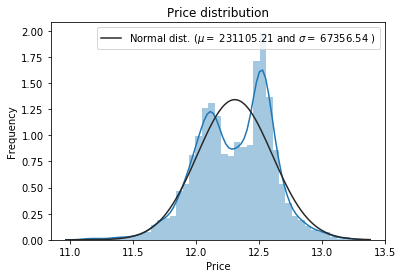

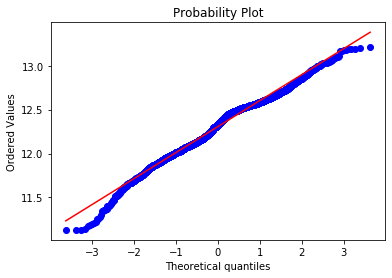

In [111]:
price_log = np.log1p(test['Price'])
sns.distplot(price_log, fit=norm)

mu, sigma = norm.fit(test['Price'])

print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'], loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(price_log, plot=plt)
plt.show()

In [112]:
test[['Id', 'Price']].to_csv('DRubtsov_predictions.csv', index=None)